# Mask RCNN - train rocks dataset
Zhiang Chen, Oct 24, 2018
#### 1. import libraries

In [1]:
import os
import sys
import random
import math
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

import tornadoo as tornado

Using TensorFlow backend.


#### 2. import dataset

In [2]:
config = tornado.TornadoConfig()
config.display()

train_dataset = tornado.TornadoDataset()
valid_dataset = tornado.TornadoDataset()

train_dataset.load_tornado('../../dataset/tornado', 'train')
valid_dataset.load_tornado('../../dataset/tornado', 'val')

train_dataset.prepare()
valid_dataset.prepare()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL                  3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_mask_loss': 1.0, 'mrcnn_class_loss': 1.0, 'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_bbox_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

#### 3. create network model

In [3]:
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [4]:
# the model will be saved under ../../logs
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [5]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

#### 4. training model

In [ ]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /models/Mask_RCNN/logs/tornado20181121T0632/mask_rcnn_tornado_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_b

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/1
 24/100 [======>.......................] - ETA: 1:34 - loss: 2.7699 - rpn_class_loss: 0.0402 - rpn_bbox_loss: 0.3323 - mrcnn_class_loss: 0.3607 - mrcnn_bbox_loss: 0.7909 - mrcnn_mask_loss: 1.2458

In [ ]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=200, 
            layers="all")


Starting at epoch 1. LR=0.0001

Checkpoint Path: /models/Mask_RCNN/logs/rocks20181025T0448/mask_rcnn_rocks_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b  

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 2/200
100/100 [==============================] - 96s 962ms/step - loss: 1.3253 - rpn_class_loss: 0.0564 - rpn_bbox_loss: 0.4423 - mrcnn_class_loss: 0.1381 - mrcnn_bbox_loss: 0.3258 - mrcnn_mask_loss: 0.3627 - val_loss: 1.3858 - val_rpn_class_loss: 0.0672 - val_rpn_bbox_loss: 0.4625 - val_mrcnn_class_loss: 0.2063 - val_mrcnn_bbox_loss: 0.3090 - val_mrcnn_mask_loss: 0.3408
Epoch 3/200
100/100 [==============================] - 67s 668ms/step - loss: 1.0666 - rpn_class_loss: 0.0500 - rpn_bbox_loss: 0.3179 - mrcnn_class_loss: 0.1278 - mrcnn_bbox_loss: 0.2459 - mrcnn_mask_loss: 0.3250 - val_loss: 1.2997 - val_rpn_class_loss: 0.0648 - val_rpn_bbox_loss: 0.4252 - val_mrcnn_class_loss: 0.1975 - val_mrcnn_bbox_loss: 0.2811 - val_mrcnn_mask_loss: 0.3311
Epoch 4/200
100/100 [==============================] - 67s 673ms/step - loss: 1.0303 - rpn_class_loss: 0.0537 - rpn_bbox_loss: 0.2434 - mrcnn_class_loss: 0.1643 - mrcnn_bbox_loss: 0.2374 - mrcnn_mask_loss: 0.3315 - val_loss: 1.2915 - val_rp

100/100 [==============================] - 67s 669ms/step - loss: 0.3254 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.0190 - mrcnn_class_loss: 0.0240 - mrcnn_bbox_loss: 0.0564 - mrcnn_mask_loss: 0.2192 - val_loss: 1.3703 - val_rpn_class_loss: 0.0680 - val_rpn_bbox_loss: 0.4571 - val_mrcnn_class_loss: 0.2180 - val_mrcnn_bbox_loss: 0.2458 - val_mrcnn_mask_loss: 0.3813
Epoch 45/200
100/100 [==============================] - 67s 667ms/step - loss: 0.3533 - rpn_class_loss: 0.0070 - rpn_bbox_loss: 0.0268 - mrcnn_class_loss: 0.0283 - mrcnn_bbox_loss: 0.0612 - mrcnn_mask_loss: 0.2300 - val_loss: 1.3354 - val_rpn_class_loss: 0.0536 - val_rpn_bbox_loss: 0.4768 - val_mrcnn_class_loss: 0.1971 - val_mrcnn_bbox_loss: 0.2284 - val_mrcnn_mask_loss: 0.3794
Epoch 46/200
100/100 [==============================] - 67s 674ms/step - loss: 0.3066 - rpn_class_loss: 0.0071 - rpn_bbox_loss: 0.0217 - mrcnn_class_loss: 0.0304 - mrcnn_bbox_loss: 0.0405 - mrcnn_mask_loss: 0.2069 - val_loss: 1.6211 - val_rpn_class_lo

In [14]:
class InferenceConfig(rocks.RocksConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "mask_rcnn_rocks_0200.h5")
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /models/Mask_RCNN/mask_rcnn_rocks_0200.h5


In [15]:
del(valid_dataset)

In [10]:
config = rocks.RocksConfig()

train_dataset = rocks.RocksDataset()
valid_dataset = rocks.RocksDataset()

train_dataset.load_rocks('../../dataset/rocks_mask', 'train')
valid_dataset.load_rocks('../../dataset/rocks_mask', 'val')

train_dataset.prepare()
valid_dataset.prepare()

original_image           shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  384.00000  int64
gt_class_id              shape: (17,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (17, 4)               min:    0.00000  max:  384.00000  int32
gt_mask                  shape: (384, 384, 17)        min:    0.00000  max:    1.00000  bool


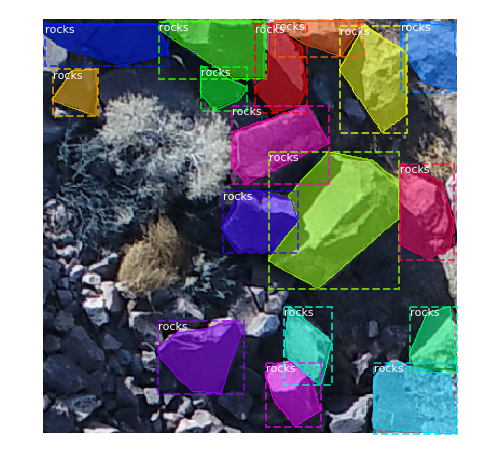

In [15]:
image_id = random.choice(valid_dataset.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(valid_dataset, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            train_dataset.class_names, figsize=(8, 8))

In [12]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.47264  max:    1.30553  float32


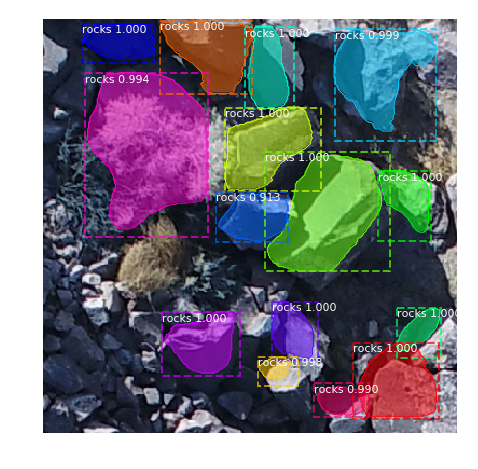

In [16]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            valid_dataset.class_names, r['scores'], ax=get_ax())